<img src="https://www.strath.ac.uk/media/1newwebsite/webteam/logos/xUoS_Logo_Horizontal.png.pagespeed.ic.M6gv_BmDx1.png" width="350" align="left" style="left">

# 2. Nyquist Zones

This notebook will introduce the concept of Nyquist Zones, a key concept in RF transmission. Nyquist Zones define regions of the frequency spectrum in relation to the sampling rate, by exploiting aliasing frequencies above $\frac{f_{s}}{2}$ may be observed. This will be covered in stages, first exploring the Nyquist Sampling Rate, then Aliasing before linking these ideas to explain Nyquest Zones. 

## Table of Contents

* [2. Nyquist Zones](02_nyquist_zones.ipynb)
    * [2.1 Nyquist Sampling Rate](#sampling_rate)
    * [2.2 Aliasing](#aliasing)
    * [2.3 Nyquist Zones](#nyquist_zones)
    * [2.4 Conclusion](#conclusion)

## 2.1 Nyquist Sampling Rate <a class="anchor" id="sampling_rate"></a>

If a baseband, bandlimited signal is composed of sine waves up to a frequency $f_{b}$ Hz, then the Nyquist Frequency is:

$$ f_{n} = 2f_{b}$$

If we require to sample this signal and retain all information, then the sampling rate, $f_{s}$, must be chosen as:

$$f_{s} > f_{n} = f_{s} > 2f_{b}$$

This frequency is often referred to as the Nyquist sampling rate, (distinct from the Nyquist frequency!).

## 2.2 Aliasing <a class="anchor" id="aliasing"></a>

When a (baseband) signal is sampled at a frequency *below* the Nyquist rate, then we "lose" the signal frequency information and aliasing is said to have occurred. Aliasing can be illustrated by sampling a sine wave below the Nyquist rate and then "reconstructing". We note that it appears as a sine wave of *lower* frequency.

First we import the required libraries, numPy for computation and MatplotLib for Matlab-like plotting. We will also be using two user defined functions to assist in plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We then define the frequency of our system and the basic parameters. We choose $f_{s}$ is chosen as 1024 Hz, and we will be observing what happens when we sample a signal with a frequency above $\frac{f_{s}}{2}$.

In [2]:
# Set basic params
fs = 1024 # sample rate
N_fft = 512 # fft size

t = np.arange(N_fft)/fs #time scale

Here we define three signals, each composed of 3 sine waves:

$$w(t) = 100\sin(2 \pi 100 t) + 50\sin(2 \pi 250 t) + 25\sin(2 \pi 400 t)$$

$$x(t) = 100\sin(2 \pi 900 t) + 50\sin(2 \pi 750 t) + 25\sin(2 \pi 600 t)$$

$$y(t) = 100\sin(2 \pi 1100 t) + 50\sin(2 \pi 1250 t) + 25\sin(2 \pi 1400 t)$$

In [3]:
# Define 3 signals
w = 100*np.sin(2*np.pi*100*t) + 50*np.sin(2*np.pi*250*t) + 25*np.sin(2*np.pi*400*t)
x = 100*np.sin(2*np.pi*900*t) + 50*np.sin(2*np.pi*750*t) + 25*np.sin(2*np.pi*600*t)
y = 100*np.sin(2*np.pi*1100*t) + 50*np.sin(2*np.pi*1250*t) + 25*np.sin(2*np.pi*1400*t)

In [4]:
# Calculate FFT for each signal
w_fft_result = np.fft.fft(w, N_fft)
x_fft_result = np.fft.fft(w, N_fft)
y_fft_result = np.fft.fft(w, N_fft)

# Get the corresponding frequencies, that depend on N_fft and Fs
freqs = np.fft.fftfreq(N_fft,1/fs)

By plotting the FFTs of these signals sampled at 1000 Hz we can see the effects of aliasing - all three signals have been aliased, to 100, 250 and 400 Hz components respectively. Clearly if a signal has frequency components greater than $\frac{f_{s}}{2}$ then aliasing will occur, manifesting as a distortion of a signal. 

From a knowledge of $f_{s}$ and the input frequencies it is straightforward to establish the frequency of the aliased components for any given components above $\frac{f_{s}}{2}$. The reconstructed signal has a frequency of:

$$f_{s} - f_{signal} = f_{reconstructed}$$

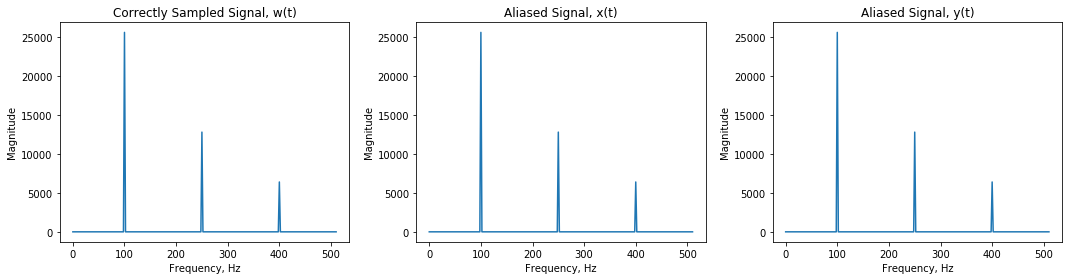

In [5]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].plot(freqs[:int(N_fft/2)], np.abs(w_fft_result[:int(N_fft/2)]))
axs[0].set_title('Correctly Sampled Signal, w(t)')
axs[0].set_ylabel('Magnitude')
axs[0].set_xlabel('Frequency, Hz')
fig.tight_layout()

axs[1].plot(freqs[:int(N_fft/2)], np.abs(x_fft_result[:int(N_fft/2)]))
axs[1].set_title('Aliased Signal, x(t)')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, Hz')
fig.tight_layout()

axs[2].plot(freqs[:int(N_fft/2)], np.abs(y_fft_result[:int(N_fft/2)]))
axs[2].set_title('Aliased Signal, y(t)')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, Hz')
fig.tight_layout()

In our example, we sampled three signals each at 1000 Hz. If we sample a sum of a few sine waves, *w(t)*, at 1000 Hz we adhere to the Nyquist criteria. In [Figure 1](#fig-1), we represent the signal to be sampled as a simple (sine wave amplitude) spectrum:

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/Aliasing_w.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: Correctly Sampled Signal, w(t)</b></figcaption>
</figure>

Of course, if we had sampled the signal, *x(t)* (i.e. sine waves at 900 Hz, 750 Hz and 600 Hz) at 1000 Hz, then because the Nyquist criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components. This can be seen in [Figure 2](#fig-2):

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/Aliasing_x.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: Aliased Signal, x(t)</b></figcaption>
</figure>

Similarly, if we sampled the signal *y(t)* (i.e. sine waves at 1100 Hz, 1250 Hz and 1400 Hz) at 1000 Hz, then as the Nyquist criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components, shown in [Figure 3](#fig-3): 

<a class="anchor" id="fig-3"></a>
<figure>
<img src='./images/Aliasing_y.png' height='30%' width='30%'/>
    <figcaption><b>Figure 3: Aliased Signal, y(t)</b></figcaption>
</figure>

We can then note a pattern of spectrum aliasing as shown below in [Figure 4](#fig-4):

<a class="anchor" id="fig-4"></a>
<figure>
<img src='./images/spectrumPattern.png' height='30%' width='30%'/>
    <figcaption><b>Figure 4: Pattern of Spectrum Aliasing</b></figcaption>
</figure>

Clearly the above system sampling at 1000 Hz would be best limited to only have input signals with frequencies below 500 Hz. However, **aliasing can be exploited**, such as in situations where we wish to demodulate a signal. If this signal is appropriately bandlimited, the output signal will alias to the same "shape" at baseband frequencies. This general process is called undersampling, and is applicable in software defined radio systems for the direct demodulation of received signals. 

## 2.3 Nyquist Zones <a class="anchor" id="nyquist_zones"></a>

Noting the 'folding' of signal spectra that was observed in [Figure 4](#fig-4), around integer multiples of $\frac{f_{s}}{2}$, we can define these regions of the frequency spectrum as **Nyquist Zones**. Shown in [Figure 5](#fig-5), if the signal was sampled at $f_{s}$, any signal components present at a 'red' frequency shown in the diagram would alias down to the corresponding 'blue' position in the baseband region.

<a class="anchor" id="fig-5"></a>
<figure>
<img src='./images/NyquistZones.png' height='50%' width='50%'/>
    <figcaption><b>Figure 5: Overview of Nyquist Zones</b></figcaption>
</figure>

An analogue lowpass filter is needed to retain the frequencies in Nyquist Zone 1, and attenuate any components at higher frequencies that would otherwise alias into this region. Similarly, if we wanted to exploit aliasing from a higher Nyquist Zone, a suitable analogue bandpass filter would be required, to ensure that only the desired signal components alias into Nyquist Zone 1. 

For example, suppose that the signal of interest resides entirely in Nyquist Zone 5, and that unwanted signal components exist in Bands 4 and 6. To avoid the unwanted signal components also being aliased to the baseband region, and being superimposed onto the desired signal, a bandpass filter must be applied around Nyquist Zone 5 prior to sampling.

## 2.4 Conclusion <a class="anchor" id="conclusion"></a>

Through this notebook we have explored Nyquist sampling rates and aliasing to understand Nyquist Zones. We have seen how a signal with frequencies above the Nyquist sampling rate will be aliased to baseband, and shown how this can be exploited to allow us to work with signals which would otherwise be beyond the capabilities of the system. The notebook ended by showing these Nyquist Zones, where the spectrum can be viewed as integer multiples of $\frac{f_{s}}{2}$ to understand how a desired signal will be aliased.

[⬅️ Previous Notebook](01_introduction.ipynb) | | [Next Notebook ➡️](03_RF_spectrum.ipynb)

----
----